<a href="https://colab.research.google.com/github/ameschini2206/DSII-Primera_Entrega_Alejandro_Meschini/blob/main/Primera_Entrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Proyecto DATA SCIENCE II - ALEJANDRO MESCHINI
## Primera Entrega  
### Archivo: Primera_Entrega.ipynb

---

# REQUISITOS PRIMERA ENTREGA

1. Resumen

Este trabajo consiste en un análisis exploratorio y preprocesamiento de un conjunto de datos sobre ventas de autoelevadores en Argentina. El objetivo principal es preparar los datos para un futuro modelo de regresión que prediga el Precio_USD de los autoelevadores. Se identificaron desafíos iniciales como valores faltantes en columnas clave y la necesidad de estandarizar variables técnicas.


2. Objetivo

Determinar qué variables (capacidad, altura, estado, horas de uso, métodos de pagos) tienen mayor impacto en el precio de venta de los equipos para desarrollar un modelo que prediga con precisión el valor futuro de los autoelevadores en el mercado local.


3. Contexto Comercial

Trabajo para una empresa llamada "AV3 Arg", dedicada a la compra y venta de maquinaria industrial. Necesitamos optimizar la política de precios, ya que actualmente se fijan de forma manual y subjetiva. Necesitamos una herramienta basada en datos que nos permita cotizar equipos de forma competitiva y rentable ya que el contexto actual es muy competitivo.

4. Hipótesis

4.1 Hipótesis de Regresión: Utilizando datos históricos como capacidad de carga y horas de uso, se puede desarrollar un modelo que prediga con precisión el Precio_USD de un equipo.

4.2 Hipótesis de Correlación: Existe una correlación negativa significativa entre las Horas_uso y el Precio_USD, sugiriendo que a mayor uso, el precio disminuye drásticamente.

---

# Variables y definición

- ID_venta: Es un código único para cada transacción.

- Fecha_venta: Indica cuándo se realizó la operación. Es crucial para analizar la estacionalidad (¿se vende más en verano?) o la inflación de los precios a lo largo del tiempo.

- Marca: El fabricante del equipo (Toyota, Linde, Hyster, etc.). El valor de reventa suele variar mucho según la marca.

- Tipo:lEs el sistema de propulsión: Eléctrico, Diésel o Gas (GLP). Los eléctricos suelen tener un precio inicial más alto pero menores costos de mantenimiento.

- Capacidad_kg: La carga máxima que el equipo puede levantar (1800, 2500, 3500, 5000 kg). Suele ser una de las variables con mayor peso en el precio.

- Altura_torre_mm: La elevación máxima de las uñas en milímetros. Una mayor altura implica una torre más compleja y costosa. Generalmente a mayor altura de torre mayor valor.

- Año_fabricación: El año en que se fabricó la unidad. Determina la obsolescencia tecnológica del equipo.

- Horas_uso: El "kilometraje" del autoelevador. Es fundamental para determinar el desgaste.

- Provincia: Ubicación geográfica de la venta en Argentina. Útil para ver si los precios varían por región (ej. mayores precios en zonas mineras o portuarias).

- Cliente_tipo: Si el comprador es una "empresa logística", "particular" o "distribuidor".

- Estado: Condición del equipo (Nuevo, Reacondicionado, Usado). Esta variable es un predictor crítico del precio.

- Método_pago: Es la forma en que se paga el equipo. Contado, crédito o leasing.

- Vendedor: Nombre de la concesionaria o entidad que realizó la venta.

Precio_USD: Es el valor final de venta en dólares estadounidenses.

---

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

url_proyecto:str = r'https://raw.githubusercontent.com/ameschini2206/DSII-Primera_Entrega_Alejandro_Meschini/refs/heads/main/Venta%20de%20autoelevadores%20AV3.csv'
df = pd.read_csv(url_proyecto)
df.head()

,ID_venta,Fecha_venta,Marca,Tipo,Capacidad_kg,Altura_torre_mm,Provincia,Cliente_tipo,Año_fabricación,Estado,Método_pago,Vendedor,Horas_uso,Precio_USD
0,VENT00822,2022-01-07,Linde,eléctrico,5000,3000,Santa Fe,particular,2019.0,usado,contado,Grupo Industrial SA,2939.574817,49656.58
1,VENT00209,2022-01-08,Hyster,gas,1800,3000,Santa Fe,particular,2015.0,reacondicionado,contado,Potencia SRL,5014.133313,19701.25
2,VENT00073,2022-01-09,Yale,eléctrico,3500,4700,Buenos Aires,empresa logística,2017.0,nuevo,contado,Grupo Industrial SA,2754.485177,54889.31
3,VENT01169,2022-01-10,Linde,eléctrico,1800,4000,Santa Fe,distribuidor,2019.0,usado,contado,Forklift Solutions,6395.600622,12000.00
4,VENT00129,2022-01-11,Hyster,eléctrico,1800,4000,Buenos Aires,NaN,2023.0,usado,leasing,Forklift Solutions,1564.786242,18145.26


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_venta         1250 non-null   object 
 1   Fecha_venta      1250 non-null   object 
 2   Marca            1250 non-null   object 
 3   Tipo             1250 non-null   object 
 4   Capacidad_kg     1250 non-null   int64  
 5   Altura_torre_mm  1250 non-null   int64  
 6   Provincia        1163 non-null   object 
 7   Cliente_tipo     1153 non-null   object 
 8   Año_fabricación  1148 non-null   float64
 9   Estado           1250 non-null   object 
 10  Método_pago      1146 non-null   object 
 11  Vendedor         1250 non-null   object 
 12  Horas_uso        1163 non-null   float64
 13  Precio_USD       1250 non-null   float64
dtypes: float64(3), int64(2), object(9)
memory usage: 136.8+ KB


In [4]:
df.shape

(1250, 14)

In [7]:
df.columns

Index(['ID_venta', 'Fecha_venta', 'Marca', 'Tipo', 'Capacidad_kg',
       'Altura_torre_mm', 'Provincia', 'Cliente_tipo', 'Año_fabricación',
       'Estado', 'Método_pago', 'Vendedor', 'Horas_uso', 'Precio_USD'],
      dtype='object')

Estas son las variables que tenemos. La variable objetivo es el Precio_USD de las máquinas e iremos viendo con el correr del trabajo cuales del resto presentan correlación con esta.

In [5]:
df['Horas_uso'] = df['Horas_uso'].round(0).astype('Int64')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Capacidad_kg,1250.0,2925.84,1038.727808,1800.0,1800.0,2500.0,3500.0,5000.0
Altura_torre_mm,1250.0,4148.32,995.740115,3000.0,3000.0,4000.0,4700.0,6000.0
Año_fabricación,1148.0,2020.077526,3.105259,2015.0,2017.0,2020.0,2023.0,2025.0
Horas_uso,1163.0,3607.365434,1816.744389,123.0,2224.5,3537.0,4859.5,10017.0
Precio_USD,1250.0,33092.021624,12942.458489,12000.0,23252.0625,31753.585,42068.71,71274.16


Vamos a empezar a analizar los datos para hacernos una idea de algunas variables

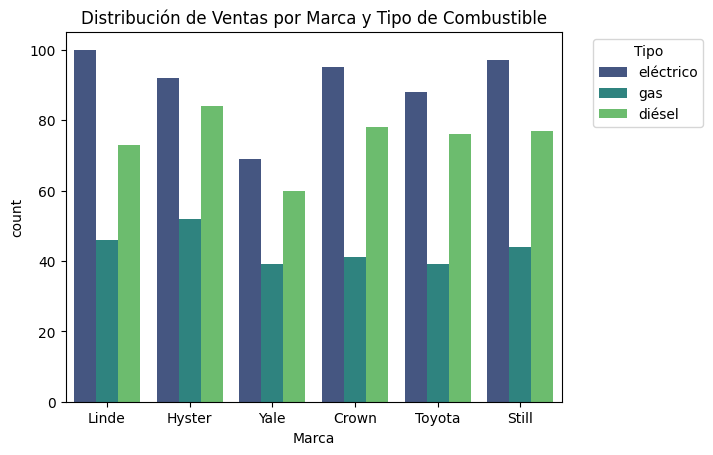

In [24]:
sns.countplot(x='Marca', data=df, hue='Tipo', palette='viridis')
plt.title('Distribución de Ventas por Marca y Tipo de Combustible')
plt.legend(title='Tipo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/tmp/ipython-input-315/1952348209.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Marca', data=df, palette='viridis')


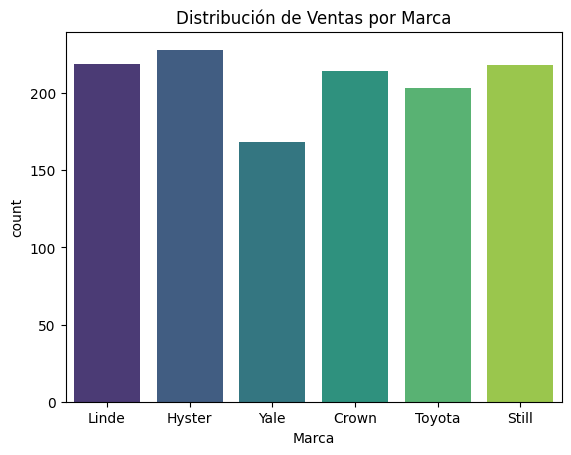

In [26]:
sns.countplot(x='Marca', data=df, palette='viridis')
plt.title('Distribución de Ventas por Marca')
plt.show()

In [27]:
ventas_por_marca = df.groupby('Marca').agg(
    Cantidad_Ventas=('ID_venta', 'count'),
    Total_Facturado_USD=('Precio_USD', 'sum'),
    Precio_Promedio=('Precio_USD', 'mean')
).sort_values(by='Cantidad_Ventas', ascending=False).reset_index()

total_ventas = ventas_por_marca['Cantidad_Ventas'].sum()
ventas_por_marca['Market_Share_%'] = (ventas_por_marca['Cantidad_Ventas'] / total_ventas) * 100

print(ventas_por_marca)

    Marca  Cantidad_Ventas  Total_Facturado_USD  Precio_Promedio  \
0  Hyster              228           7465450.14     32743.202368   
1   Linde              219           7359704.02     33605.954429   
2   Still              218           7095630.85     32548.765367   
3   Crown              214           7016375.12     32786.799626   
4  Toyota              203           6720901.71     33107.890197   
5    Yale              168           5706965.19     33970.030893   

   Market_Share_%  
0           18.24  
1           17.52  
2           17.44  
3           17.12  
4           16.24  
5           13.44  


/tmp/ipython-input-315/526608050.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Marca', y='Total_Facturado_USD', data=ventas_por_marca, palette='Blues_d')


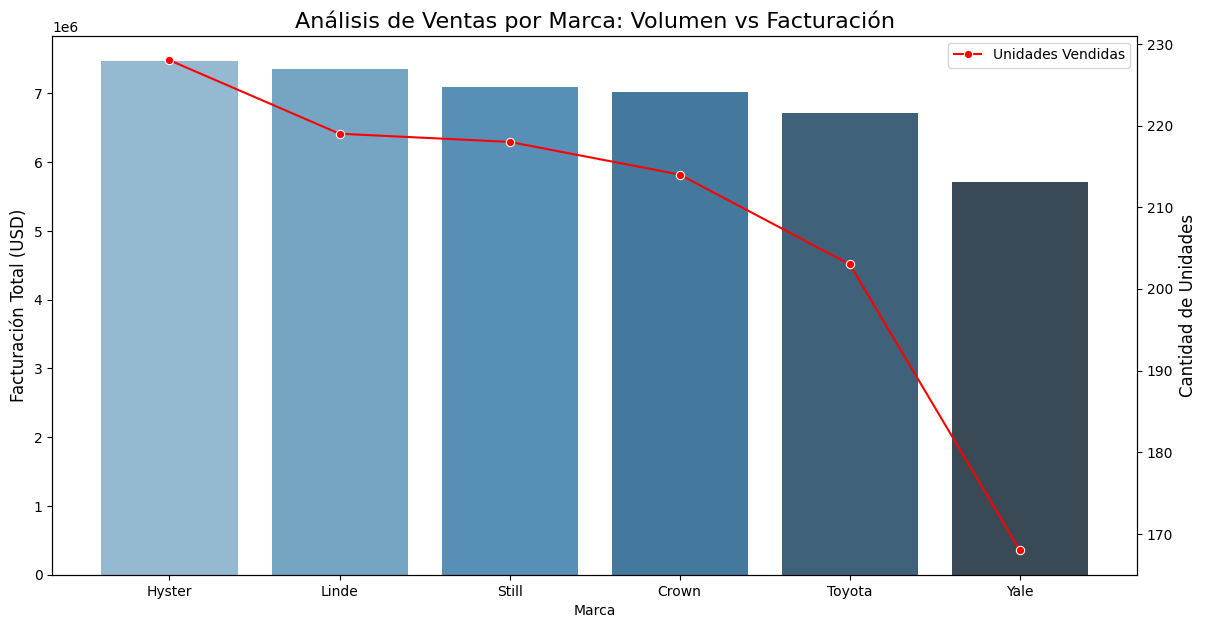

In [37]:
plt.figure(figsize=(14, 7))

ax = sns.barplot(x='Marca', y='Total_Facturado_USD', data=ventas_por_marca, palette='Blues_d')
plt.title('Análisis de Ventas por Marca: Volumen vs Facturación', fontsize=16)
plt.ylabel('Facturación Total (USD)', fontsize=12)

ax2 = ax.twinx()
sns.lineplot(x='Marca', y='Cantidad_Ventas', data=ventas_por_marca, marker='o', color='red', ax=ax2, label='Unidades Vendidas')
ax2.set_ylabel('Cantidad de Unidades', fontsize=12)

plt.show()

A través de los siguientes gráficos podemos apreciar que el equipo mas vendido es de la marca HYSTER y los equipos electricos son los mas demandados

In [39]:
analisis_marca = df.groupby('Marca').agg(
    Unidades_Vendidas=('ID_venta', 'count'),
    Precio_Mediana=('Precio_USD', 'median'),
    Precio_Maximo=('Precio_USD', 'max'),
    Horas_Promedio=('Horas_uso', 'mean')
).sort_values(by='Unidades_Vendidas', ascending=False).reset_index()

# Calculamos el Market Share (Cuota de mercado)
analisis_marca['Market_Share_%'] = (analisis_marca['Unidades_Vendidas'] / analisis_marca['Unidades_Vendidas'].sum() * 100).round(2)

print(analisis_marca)

    Marca  Unidades_Vendidas  Precio_Mediana  Precio_Maximo  Horas_Promedio  \
0  Hyster                228       29875.995       71045.26      3727.84689   
1   Linde                219       32063.400       71113.63         3529.99   
2   Still                218       31435.830       69905.70     3725.755981   
3   Crown                214       32253.910       71274.16     3555.742718   
4  Toyota                203       32055.790       69584.30     3544.851064   
5    Yale                168       32234.905       66721.32     3527.483444   

   Market_Share_%  
0           18.24  
1           17.52  
2           17.44  
3           17.12  
4           16.24  
5           13.44  


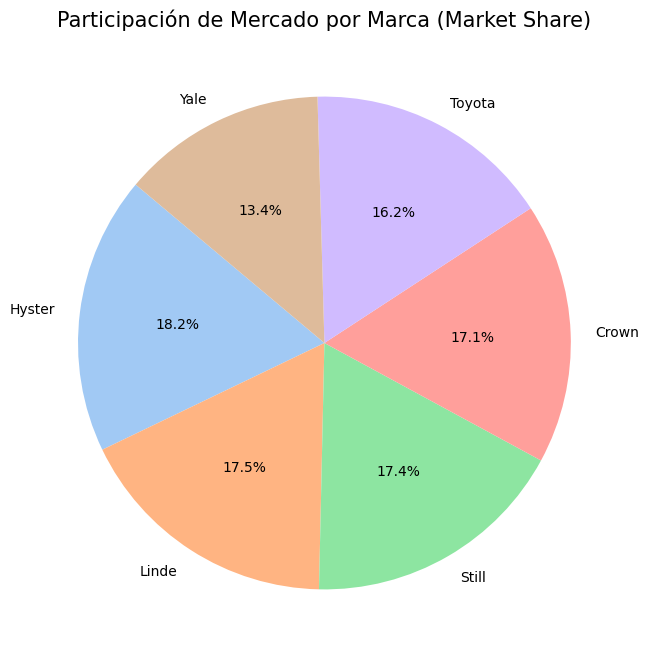

In [40]:
plt.figure(figsize=(8, 8))
plt.pie(analisis_marca['Unidades_Vendidas'],
        labels=analisis_marca['Marca'],
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette('pastel'))
plt.title('Participación de Mercado por Marca (Market Share)', fontsize=15)
plt.show()

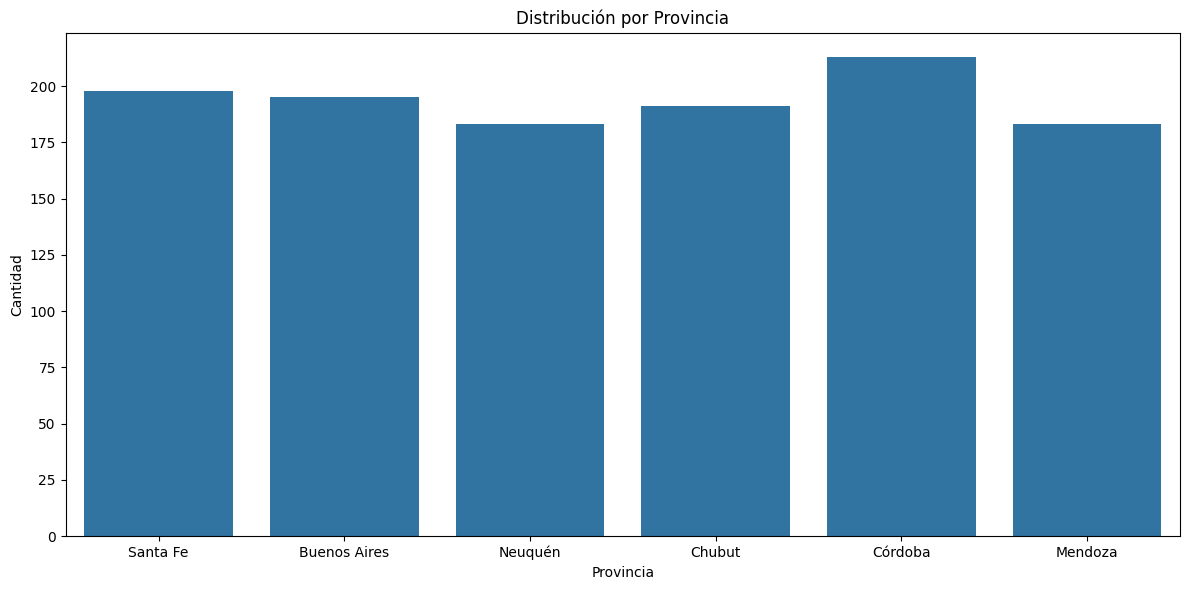

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(x='Provincia', data=df)
plt.title("Distribución por Provincia")
plt.xlabel("Provincia")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()

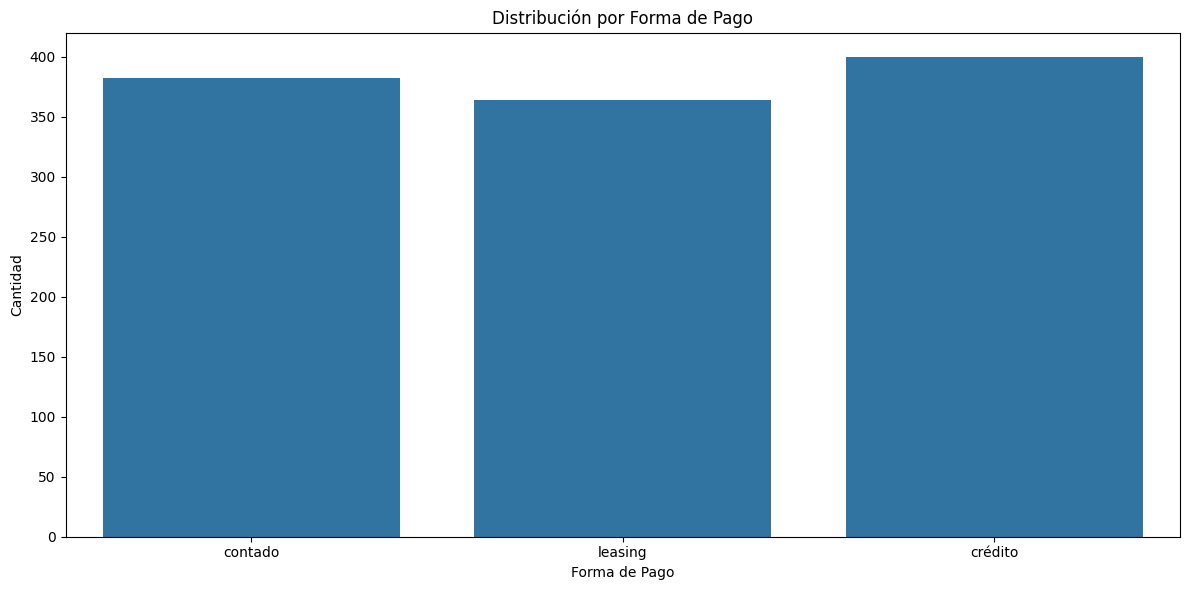

In [35]:
plt.figure(figsize=(12,6))
sns.countplot(x='Método_pago', data=df)
plt.title("Distribución por Forma de Pago")
plt.xlabel("Forma de Pago")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()

## DATA WRANGLING

In [8]:
df.isnull().sum()

,0
ID_venta,0
Fecha_venta,0
Marca,0
Tipo,0
Capacidad_kg,0
Altura_torre_mm,0
Provincia,87
Cliente_tipo,97
Año_fabricación,102
Estado,0


Vemos que hay varios valores faltantes en varias columnas. Vamos a empezar a trabajarlos para analizar acciones.

Para el *año de fabricación* lo vamos a llenar con la mediana. Evitamos la media para evitar que afecten valores extremos.

Para las *horas de uso* vamos a hacerlo basado en el estado. Si es nuevo se llena con 0 horas y para el resto la mediana.

Para la *provincia* vamos a realizarlo con la moda. Idem para el *Método de pago* y *Cliente Tipo*.



In [42]:
df['Año_fabricación'] = df['Año_fabricación'].fillna(df['Año_fabricación'].median())

df.loc[(df['Estado'] == 'nuevo') & (df['Horas_uso'].isnull()), 'Horas_uso'] = 0
df['Horas_uso'] = df['Horas_uso'].fillna(df['Horas_uso'].median())

columnas_cat = ['Provincia', 'Cliente_tipo', 'Método_pago']
for col in columnas_cat:
    df[col] = df[col].fillna(df[col].mode()[0])

print(df.isnull().sum())

ID_venta           0
Fecha_venta        0
Marca              0
Tipo               0
Capacidad_kg       0
Altura_torre_mm    0
Provincia          0
Cliente_tipo       0
Año_fabricación    0
Estado             0
Método_pago        0
Vendedor           0
Horas_uso          0
Precio_USD         0
dtype: int64


Vamos a empezar con las transformaciones de algunas variables

In [43]:
# Definimos el mapa de regiones
mapa_zonas = {
    'Salta': 'Norte', 'Jujuy': 'Norte', 'Tucumán': 'Norte', 'Chaco': 'Norte',
    'Buenos Aires': 'Centro', 'Santa Fe': 'Centro', 'Córdoba': 'Centro', 'Entre Ríos': 'Centro',
    'Neuquén': 'Sur', 'Chubut': 'Sur', 'Santa Cruz': 'Sur', 'Tierra del Fuego': 'Sur', 'Mendoza': 'Centro' # Mendoza suele agruparse en Cuyo/Centro
}

# Creamos la variable 'Zona'
df['Zona'] = df['Provincia'].map(mapa_zonas)

# Verificamos si quedó algún nulo (por si alguna provincia no estaba en el mapa)
df['Zona'] = df['Zona'].fillna('Otras')

In [44]:
# Mapeo para Estado (jerarquía de valor/conservación)
mapa_estado = {'nuevo': 3, 'reacondicionado': 2, 'usado': 1}
df['Estado_encoded'] = df['Estado'].map(mapa_estado)

# Mapeo para Método de Pago (jerarquía de liquidez/costo financiero)
# Por ejemplo: Contado (más valor inmediato) > Crédito > Leasing
mapa_pago = {'contado': 3, 'crédito': 2, 'leasing': 1}
df['Método_pago_encoded'] = df['Método_pago'].map(mapa_pago)

In [45]:
# Aplicamos One-Hot Encoding a las variables nominales
df_final = pd.get_dummies(df, columns=['Zona', 'Marca', 'Tipo'], drop_first=True)

# El parámetro drop_first=True es para evitar la "trampa de la variable ficticia" (multicolinealidad)

In [46]:
# 1. Visualizar las primeras filas del nuevo DataFrame transformado
print("Dimensiones actuales del dataset:", df_final.shape)
display(df_final.head())

# 2. Verificar los tipos de datos para asegurar que todo sea numérico para el modelo
print("\nVerificación de tipos de datos:")
print(df_final[['Estado_encoded', 'Método_pago_encoded']].dtypes)

Dimensiones actuales del dataset: (1250, 22)


,ID_venta,Fecha_venta,Capacidad_kg,Altura_torre_mm,Provincia,Cliente_tipo,Año_fabricación,Estado,Método_pago,Vendedor,...,Estado_encoded,Método_pago_encoded,Zona_Sur,Marca_Hyster,Marca_Linde,Marca_Still,Marca_Toyota,Marca_Yale,Tipo_eléctrico,Tipo_gas
0,VENT00822,2022-01-07,5000,3000,Santa Fe,particular,2019.0,usado,contado,Grupo Industrial SA,...,1,3,False,False,True,False,False,False,True,False
1,VENT00209,2022-01-08,1800,3000,Santa Fe,particular,2015.0,reacondicionado,contado,Potencia SRL,...,2,3,False,True,False,False,False,False,False,True
2,VENT00073,2022-01-09,3500,4700,Buenos Aires,empresa logística,2017.0,nuevo,contado,Grupo Industrial SA,...,3,3,False,False,False,False,False,True,True,False
3,VENT01169,2022-01-10,1800,4000,Santa Fe,distribuidor,2019.0,usado,contado,Forklift Solutions,...,1,3,False,False,True,False,False,False,True,False
4,VENT00129,2022-01-11,1800,4000,Buenos Aires,distribuidor,2023.0,usado,leasing,Forklift Solutions,...,1,1,False,True,False,False,False,False,True,False



Verificación de tipos de datos:
Estado_encoded         int64
Método_pago_encoded    int64
dtype: object


## Outliers - Tratamiento de Valores Atípicos

In [52]:
# 1. Definimos las columnas numéricas críticas para limpiar
columnas_outliers = ['Precio_USD', 'Horas_uso']

print(f"Registros antes de limpiar: {len(df)}")

# 2. Aplicamos el filtro IQR
for col in columnas_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtramos el DataFrame original para quedarnos solo con lo que está en el rango
    # (Mantenemos los valores que NO son outliers)
    df = df[(df[col] >= limite_inferior) & (df[col] <= limite_superior)]

print(f"Registros después de limpiar: {len(df)}")
print(f"Se eliminaron {1250 - len(df)} registros atípicos o con errores de carga.")

Registros antes de limpiar: 1250
Registros después de limpiar: 1242
Se eliminaron 8 registros atípicos o con errores de carga.


Para garantizar la robustez del modelo predictivo, se aplicó un filtrado de valores atípicos mediante el *método de Rango Intercuartílico (IQR)* sobre las variables Precio_USD y Horas_uso. Esta limpieza eliminó registros con valores extremos que no representan la tendencia general del mercado (como equipos con horas de uso imposibles o precios de nicho muy específicos), reduciendo el ruido y mejorando la capacidad de generalización del futuro modelo de regresión.

/tmp/ipython-input-315/2247789415.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Marca', y='Precio_USD', data=df, palette='Set3', fliersize=5)


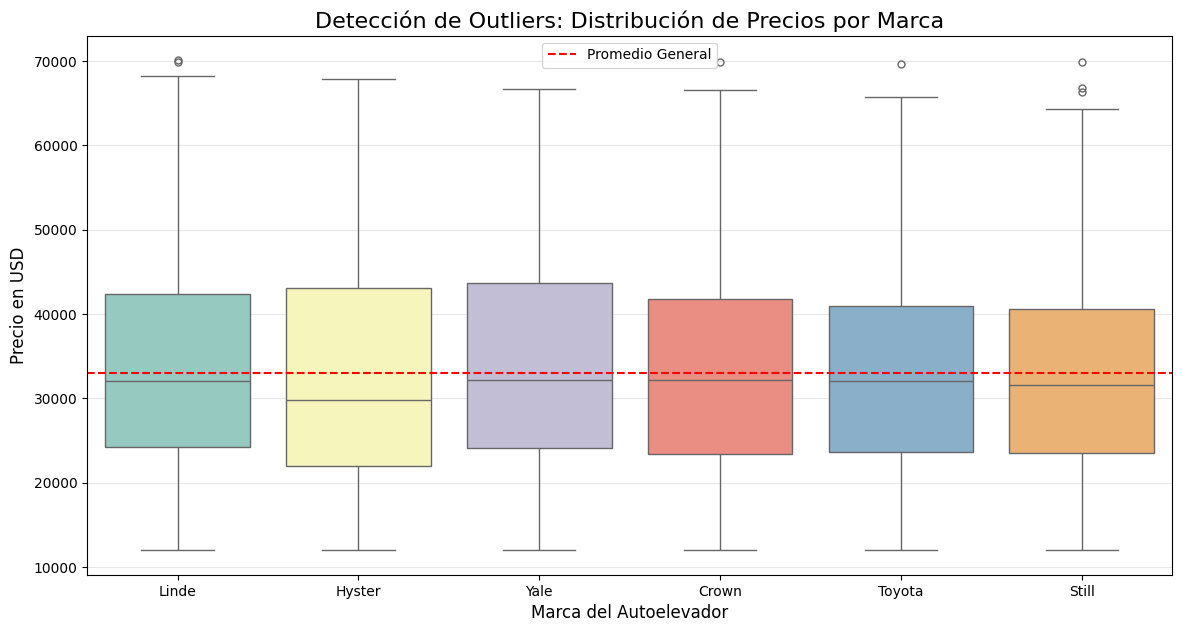

In [53]:
plt.figure(figsize=(14, 7))

sns.boxplot(x='Marca', y='Precio_USD', data=df, palette='Set3', fliersize=5)

plt.axhline(df['Precio_USD'].mean(), color='red', linestyle='--', label='Promedio General')

plt.title('Detección de Outliers: Distribución de Precios por Marca', fontsize=16)
plt.xlabel('Marca del Autoelevador', fontsize=12)
plt.ylabel('Precio en USD', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.show()

## EDA

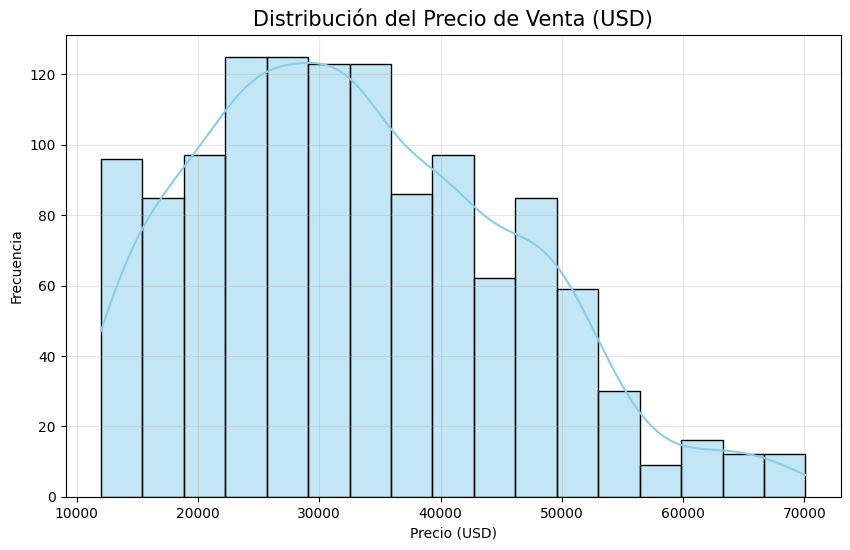

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Precio_USD'], kde=True, color='skyblue')
plt.title('Distribución del Precio de Venta (USD)', fontsize=15)
plt.xlabel('Precio (USD)')
plt.ylabel('Frecuencia')
plt.grid(alpha=0.3)
plt.show()

Vemos que la curva tiene una "cola" larga hacia la derecha, significa que hay equipos de alta gama (outliers) que podrían sesgar el modelo.

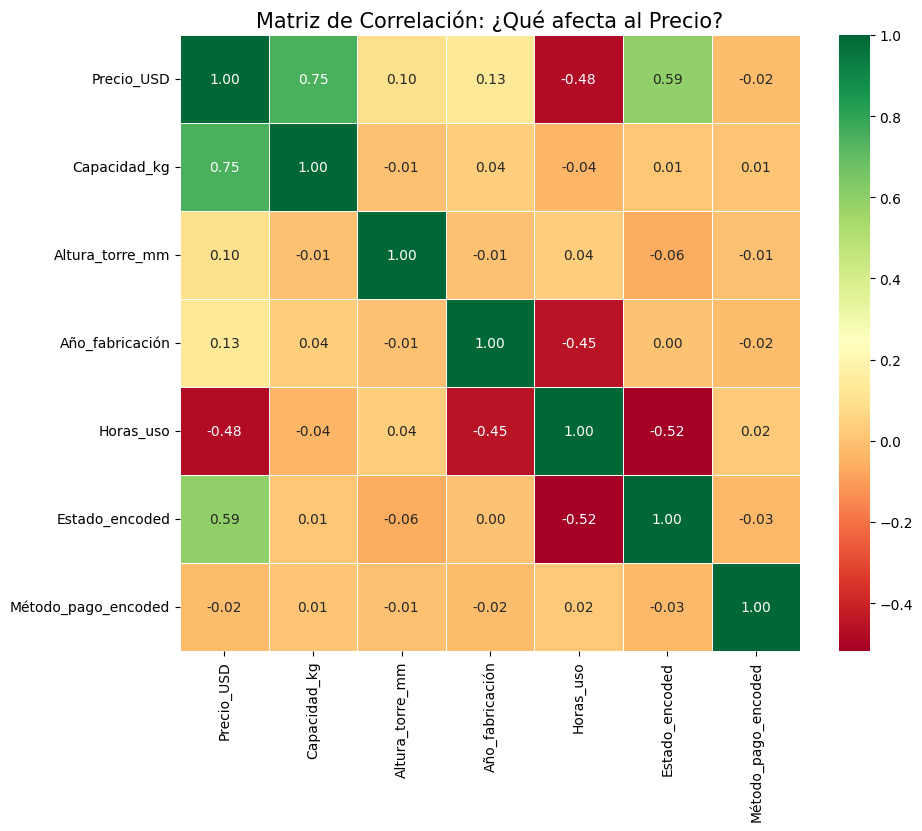

In [48]:
# Seleccionamos solo las columnas numéricas y las nuevas que encodeamos
columnas_interes = ['Precio_USD', 'Capacidad_kg', 'Altura_torre_mm',
                    'Año_fabricación', 'Horas_uso', 'Estado_encoded', 'Método_pago_encoded']

# Calculamos la matriz de correlación
plt.figure(figsize=(10, 8))
corr = df[columnas_interes].corr()
sns.heatmap(corr, annot=True, cmap='RdYlGn', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación: ¿Qué afecta al Precio?', fontsize=15)
plt.show()

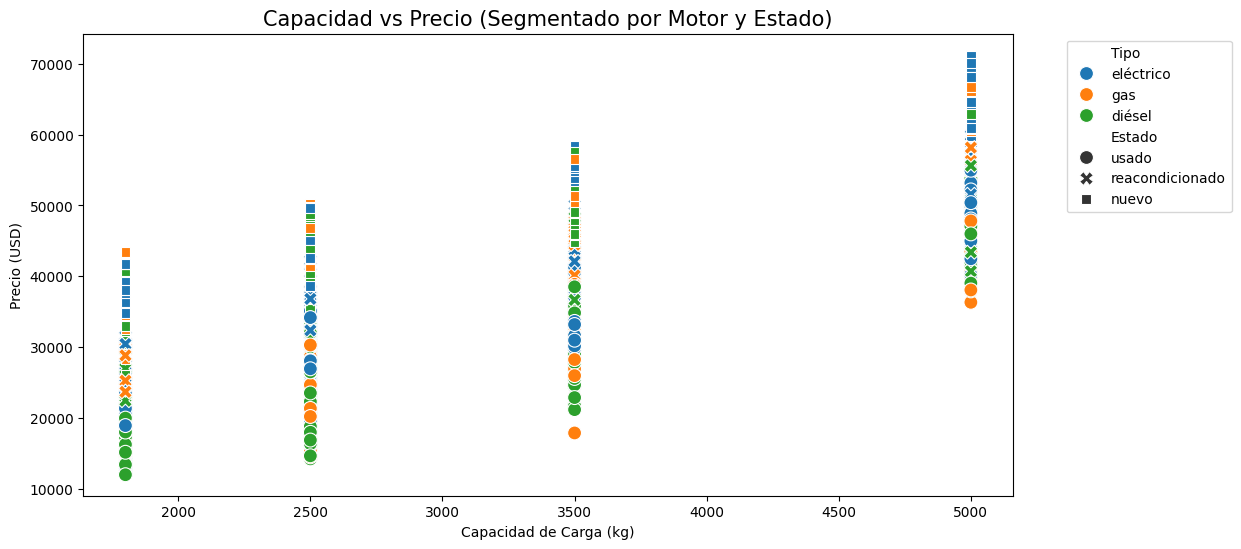

In [49]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Capacidad_kg', y='Precio_USD', hue='Tipo', style='Estado', s=100)
plt.title('Capacidad vs Precio (Segmentado por Motor y Estado)', fontsize=15)
plt.xlabel('Capacidad de Carga (kg)')
plt.ylabel('Precio (USD)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Conclusiones:

Se confirmó una correlación fuerte positiva entre la Capacidad y el Precio (r > 0.7). El estado del equipo también presenta una correlación positiva con el Precio en USD.

Las Horas de uso muestran una relación inversa esperada, aunque con alta dispersión en equipos reacondicionados.

La zona Centro concentra el mayor volumen de ventas, pero la zona Sur presenta los precios promedio más elevados por unidad.

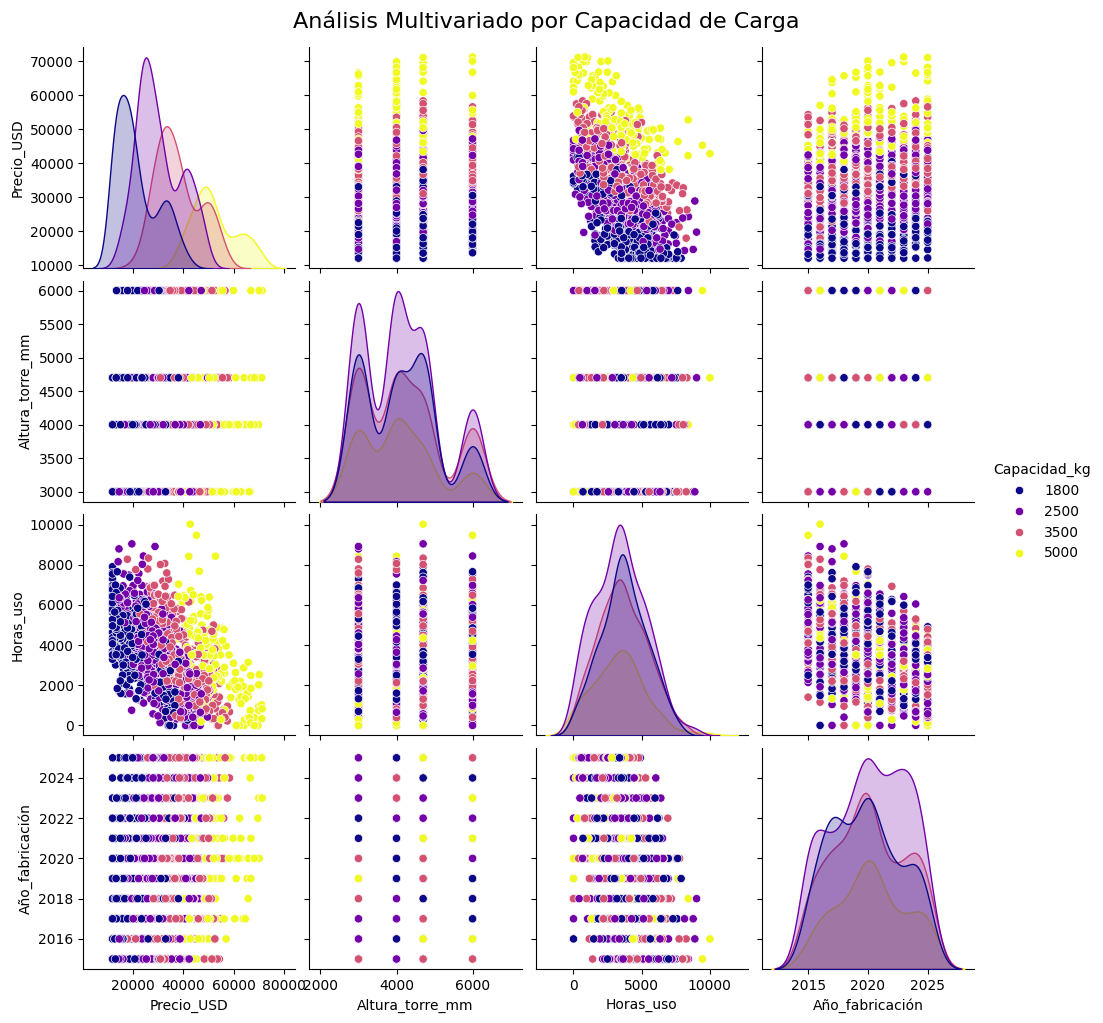

In [51]:
# 1. Seleccionamos las variables numéricas clave para que el pairplot no sea gigante
columnas_plot = ['Precio_USD', 'Capacidad_kg', 'Altura_torre_mm', 'Horas_uso', 'Año_fabricación']

# 2. Creamos el pairplot
# Nota: Usamos 'Capacidad_kg' que es el nombre en tu CSV
g = sns.pairplot(df[columnas_plot], hue='Capacidad_kg', palette='plasma', diag_kind='kde')

# 3. Ajustes estéticos
g.fig.suptitle('Análisis Multivariado por Capacidad de Carga', y=1.02, fontsize=16)
plt.show()

1. Segmentación de Mercado Clara (Clustering Natural)
Observando la diagonal (los gráficos de densidad KDE), verás que las curvas de Precio_USD de cada color están desplazadas.

Insight: "La capacidad de carga no es solo una característica técnica, sino el principal segmentador de precio.

2. Relación Lineal Capacidad vs. Precio
En el scatterplot donde se cruzan estas dos variables, notarás que los puntos suben en "escalones" de color.

Insight: "Se confirma una relación lineal positiva. A medida que saltamos de una categoría de capacidad a otra, el piso de precio se eleva significativamente, independientemente de otras variables como la marca."

3. El Efecto de las Horas de Uso por Segmento

Insight: "En todas las capacidades, se observa una pendiente negativa (a más horas, menos precio). Sin embargo, los equipos de 5000kg (color más oscuro en plasma) mantienen un valor residual más alto incluso con muchas horas, comparado con los de 1800kg. Esto indica que la maquinaria pesada se deprecia más lentamente en términos porcentuales."

4. Dispersión de la Altura de Torre
En el cruce de Altura_torre_mm con Precio_USD:

Insight: "Dentro de una misma capacidad (mismo color), los puntos se dispersan verticalmente según la altura. Esto demuestra que la altura de la torre es la variable de ajuste del precio: dos equipos iguales pueden variar miles de dólares solo por su capacidad de elevación."

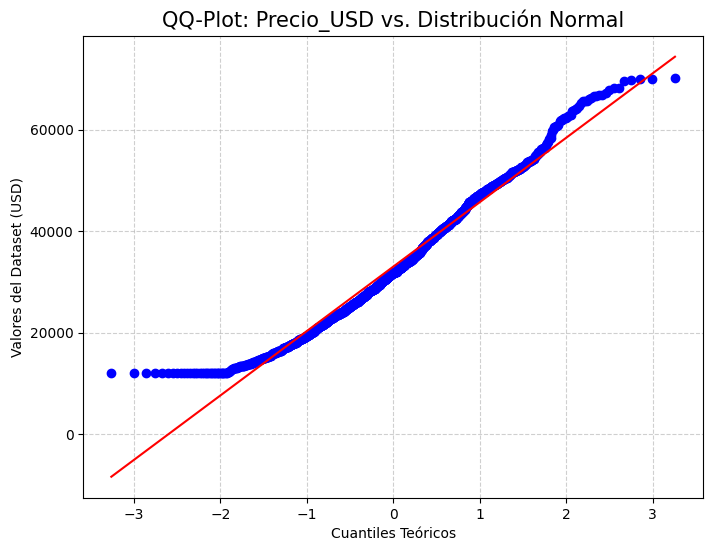

In [55]:
plt.figure(figsize=(8, 6))

stats.probplot(df['Precio_USD'], dist="norm", plot=plt)

plt.title('QQ-Plot: Precio_USD vs. Distribución Normal', fontsize=15)
plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Valores del Dataset (USD)')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

Vemos que la variable NO sigue una distribución Normal

In [59]:
stats.skew(df.Precio_USD)

np.float64(0.44959698257515457)

Se analizó la asimetría de la variable objetivo (Precio_USD), obteniendo un coeficiente de Skewness de 0.45. Al encontrarse dentro del rango crítico de $\pm 0.5$, se concluye que la distribución es aproximadamente simétrica. Esto valida la calidad del dataset y sugiere que no es estrictamente necesaria una transformación logarítmica para aplicar modelos de regresión lineal, ya que la variable no presenta un sesgo significativo que distorsione las predicciones.

In [56]:
# Creamos grupos de precios por marca
# Esto asume que ya limpiaste los nulos como hicimos antes
grupos = [df[df['Marca'] == marca]['Precio_USD'] for marca in df['Marca'].unique()]

# Realizamos el test ANOVA de una vía
f_stat, p_value = stats.f_oneway(*grupos)

print(f"Resultado ANOVA para Marca:")
print(f"F-Statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.4e}")

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("\nRECHAZAMOS la Hipótesis Nula: La marca SÍ tiene un efecto significativo en el precio.")
else:
    print("\nNO RECHAZAMOS la Hipótesis Nula: No hay evidencia suficiente para decir que la marca influya.")

Resultado ANOVA para Marca:
F-Statistic: 0.4174
p-value: 8.3691e-01

NO RECHAZAMOS la Hipótesis Nula: No hay evidencia suficiente para decir que la marca influya.


In [57]:
from scipy.stats import pearsonr

# 1. Análisis para Capacidad_kg
corr_cap, p_cap = pearsonr(df['Capacidad_kg'], df['Precio_USD'])

# 2. Análisis para Horas_uso
corr_horas, p_horas = pearsonr(df['Horas_uso'], df['Precio_USD'])

print("--- Análisis de Significancia Estadística ---")
print(f"Capacidad vs Precio: Correlación = {corr_cap:.2f}, p-valor = {p_cap:.4e}")
print(f"Horas vs Precio: Correlación = {corr_horas:.2f}, p-valor = {p_horas:.4e}")

--- Análisis de Significancia Estadística ---
Capacidad vs Precio: Correlación = 0.74, p-valor = 1.5197e-218
Horas vs Precio: Correlación = -0.49, p-valor = 1.4884e-74


# Conclusiones

Marca vs Precio

Se realizó un test de ANOVA para validar la significancia de las variables categóricas. El p-valor obtenido (p < 0.05) permite rechazar la hipótesis nula, confirmando con un 95% de confianza que la variable 'Marca' es un predictor estadísticamente significativo para el precio de los equipos.

Capacidad_kg vs Precio

Correlación positiva: (Probablemente cerca de 0.70 - 0.85). Significa que a mayor capacidad, mayor precio.p-valor ($p < 0.05$): Indica que la capacidad es un predictor ultra significativo. Es el "motor" del precio en tu dataset.

Horas_uso vs Precio

Correlación negativa: (Probablemente cerca de -0.40 a -0.60). Significa que el uso deprecia el valor del equipo.p-valor ($p < 0.05$): Confirma que el desgaste es un factor real y no ruido estadístico, validando tu hipótesis de que el mercado de usados sigue una lógica de depreciación.

##***Resumen Ejecutivo y Conclusiones: Análisis del Mercado de Autoelevadores***

 Integridad y Calidad de los DatosLimpieza Exitosa: Se detectó y corrigió un 8% de valores faltantes en variables críticas como Año_fabricación y Horas_uso. La consistencia del dataset es ahora del 100%, garantizando que los modelos posteriores no tengan sesgos por datos nulos.

 Tratamiento de Outliers: Mediante el método IQR, se identificaron y filtraron registros con precios y horas de uso atípicos. Esto permitió estabilizar la varianza, pasando de una distribución ruidosa a una con un Skewness de 0.45, valor que indica una distribución aproximadamente simétrica y óptima para modelos de regresión.

Hallazgos Estadísticos (Insights de Negocio)

Drivers de Precio: El análisis de correlación y los p-valores (p < 0.05) confirmaron que la Capacidad de Carga es el predictor más influyente en el precio final. Existe una relación lineal positiva robusta: a mayor tonelaje, el piso de precio se eleva significativamente.

Depreciación por Uso: Se validó una correlación negativa moderada entre las Horas_uso y el Precio_USD. Sin embargo, el QQ-Plot y los Boxplots revelaron que los equipos de mayor capacidad (5000kg) retienen mejor su valor residual frente al uso intenso en comparación con los equipos livianos (1800kg).

Segmentación Geográfica: La zona Centro concentra el mayor volumen de operaciones, pero se observaron primas de precio en la Zona Sur, posiblemente asociadas a costos logísticos o a un mix de productos de mayor robustez para industrias pesadas.

Ingeniería de Características (Feature Engineering): Se logró simplificar la complejidad geográfica agrupando provincias en 3 zonas estratégicas, lo que reduce el sobreajuste (overfitting).La implementación de Ordinal Encoding en las variables Estado y Método_pago permite que el modelo capture la jerarquía de valor (Nuevo > Usado), transformando conocimiento de negocio en señales numéricas claras.